## Introduction

This Colab notebook is used as a means to prepare the data given from [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) for local housing market factors and homelessness. The primary objectives are to identify market factors that have established effects on homelessness and construct and evaluate empirical models of community-level homelessness. I will be exploring and performing any necessary arrangments to the original data sets to then export a cleaned version for a data analysis.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

The project utilizes one data set and a dictionary which contains descriptions of all variables in the data set. The [Data](https://github.com/varelandrew/Homelessness/blob/main/05b_analysis_file_update.csv) and [Dictionary](https://github.com/varelandrew/Homelessness/blob/main/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv) consists of various housing, economic, safety net, demographic, and climate factors sourced largely from HUD and U.S. Census Bureau databases. If you want a more in-depth look into the source of teh data look here: [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) in the section titled DATA.

## Load the data

Here I am just loading the dataset and dictionary.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/varelandrew/Homelessness/main/05b_analysis_file_update.csv')

In [3]:
df_dict = pd.read_csv('https://raw.githubusercontent.com/varelandrew/Homelessness/main/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv')

## Explore the contents of the data set

The below lines of code are just meant to showcase what the data that we imported in looks like.

In [4]:
df

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,2013,WY-500,501.0,452.0,953.0,306.0,371.0,677.0,195.0,81.0,...,0,0,0,0,0,0,1,0,0,1
3004,2014,WY-500,563.0,194.0,757.0,327.0,136.0,463.0,236.0,58.0,...,1,1,1,3,1,0,1,0,0,1
3005,2015,WY-500,507.0,291.0,798.0,292.0,208.0,500.0,215.0,83.0,...,0,0,0,0,0,0,1,0,0,1
3006,2016,WY-500,491.0,366.0,857.0,277.0,240.0,517.0,214.0,126.0,...,1,1,1,3,1,0,1,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Columns: 332 entries, year to rural
dtypes: float64(257), int64(73), object(2)
memory usage: 7.6+ MB


In [6]:
df_dict

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
...,...,...,...,...,...,...
327,Subgroup,sub_west_coast_all_urb,indicator for suburban or major city/largely u...,No,NaN,NaN
328,Subgroup,sub_west_census,indicator for west region CoCs,No,NaN,NaN
329,Subgroup,major_city,indicator for major city or largely urban CoC,No,HUD,NaN
330,Subgroup,suburban,indicator for largely suburban CoC,No,HUD,NaN


In [7]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Associated Domain        332 non-null    object
 1   Variable                 332 non-null    object
 2   Variable Label           332 non-null    object
 3   Derived                  332 non-null    object
 4   Source or Root Variable  307 non-null    object
 5   Table Name(s)            105 non-null    object
dtypes: object(6)
memory usage: 15.7+ KB


### Explore the data sources

Here I am finding the unique `Associated Domain` values.

In [8]:
unique_domains = df_dict['Associated Domain'].unique()
print(unique_domains)

['Identifier' 'Outcome' 'Secondary Outcome' 'Subgroup' 'Safety Net'
 'Demographic' 'Housing' 'Economic' 'Local Policy' 'Climate' 'Geography']


I notice 11 different unique domain values ouputted here for the dataset.

Here I am making a bar graph of the counts of different data sources described in `Source or Root Variable`.

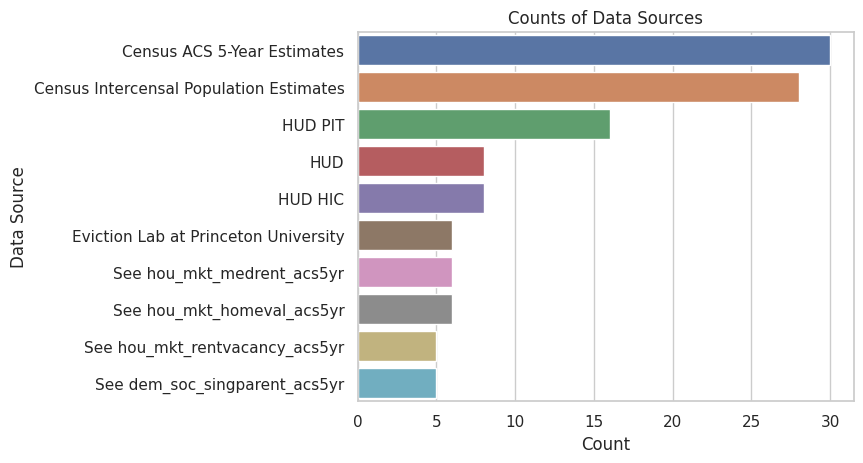

In [9]:
counts = df_dict['Source or Root Variable'].value_counts().head(10)
sns.barplot(x=counts.values, y=counts.index, orient='horizontal')
plt.xlabel('Count')
plt.ylabel('Data Source')
plt.title('Counts of Data Sources')
plt.show()

I notice from this output that majority of the data comes from three mains sources: Census ACS 5-Year Estimates, Census Intercensal Population Estimates, and HUD.

## Select relevant subsets of the data

The dataset contains a lot of columns of data and I really only want data that could or can be used as predictors, so I kept the columns below and updated the dataset to reflect the kept columns.

In [10]:
columns_to_keep = ["year", "cocnumber",
  
                  "pit_tot_hless_pit_hud", "pit_tot_shelt_pit_hud", "pit_tot_unshelt_pit_hud","dem_pop_pop_census",
  
                  "fhfa_hpi_2009", "ln_hou_mkt_medrent_xt", "hou_mkt_utility_xt", "hou_mkt_burden_own_acs5yr_2017", "hou_mkt_burden_sev_rent_acs_2017", "hou_mkt_rentshare_acs5yr_2017", "hou_mkt_rentvacancy_xt", "hou_mkt_density_dummy", "hou_mkt_evict_count", "hou_mkt_ovrcrowd_acs5yr_2017", "major_city", "suburban",
           
                  "econ_labor_unemp_rate_BLS", "econ_labor_incineq_acs5yr_2017", "econ_labor_pov_pop_census_share",
           
                  "hou_pol_hudunit_psh_hud_share", "hou_pol_occhudunit_psh_hud", "hou_mkt_homeage1940_xt",
           
                  "dem_soc_black_census", "dem_soc_hispanic_census", "dem_soc_asian_census", "dem_soc_pacific_census", "dem_pop_child_census", "dem_pop_senior_census", "dem_pop_female_census", "dem_pop_mig_census", "d_dem_pop_mig_census_share", "dem_soc_singadult_xt", "dem_soc_singparent_xt", "dem_soc_vet_xt", "dem_soc_ed_lessbach_xt", "dem_health_cost_dart", "dem_health_excesdrink_chr",
           
                  "env_wea_avgtemp_noaa", "env_wea_avgtemp_summer_noaa", "env_wea_precip_noaa", "env_wea_precip_annual_noaa"]
    

In [11]:
new_df = df.loc[:, columns_to_keep]

Here I am also reflecting the change in columns under the `Variable` column in the dictionary.

In [12]:
df_dict_new = df_dict[df_dict['Variable'].isin(columns_to_keep)]

I am once again finding the unique `Associated Domain` values as well as graphing the `Source or Root Variable`.

In [13]:
unique_domains = df_dict_new['Associated Domain'].unique()
print(unique_domains)

['Identifier' 'Outcome' 'Demographic' 'Housing' 'Economic' 'Safety Net'
 'Climate' 'Subgroup']


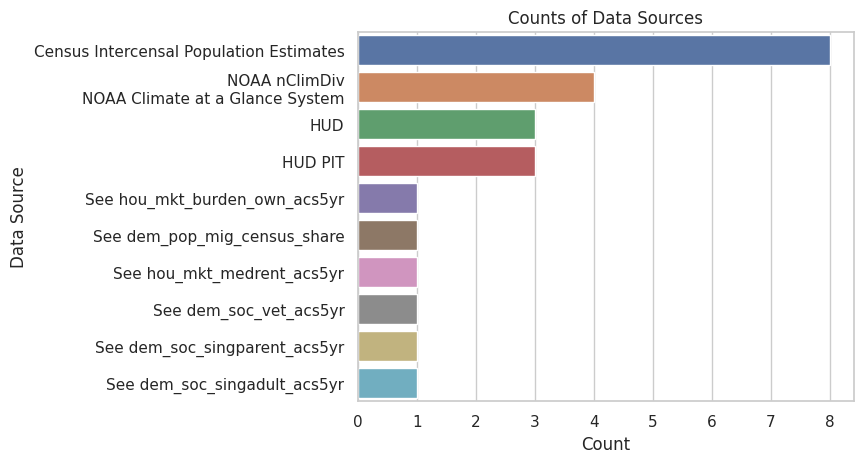

In [14]:
counts = df_dict_new['Source or Root Variable'].value_counts().head(10)
sns.barplot(x=counts.values, y=counts.index, orient='horizontal')
plt.xlabel('Count')
plt.ylabel('Data Source')
plt.title('Counts of Data Sources')
plt.show()

From both outputs I noticed a change in the amount of unqiue Domains as well as a shift in the top data sources.

## Rename columns

Here I am just renaming both the dataset and dictionary variables to more readable and good formatted wording for best practices.

In [15]:
new_df = new_df.rename(columns = {"cocnumber":"coc_number",
  
                          "pit_tot_hless_pit_hud":"total_homeless", 
                          "pit_tot_shelt_pit_hud":"total_sheltered", 
                          "pit_tot_unshelt_pit_hud":"total_unsheltered",
                          "dem_pop_pop_census":"total_population",
  
                          "fhfa_hpi_2009":"house_price_index_2009", 
                          "ln_hou_mkt_medrent_xt":"log_median_rent", 
                          "hou_mkt_utility_xt":"utility_costs", 
                          "hou_mkt_burden_own_acs5yr_2017":"percentage_owners_cost_burden_2016", 
                          "hou_mkt_burden_sev_rent_acs_2017":"percentage_renters_severe_cost_burden_2016", 
                          "hou_mkt_rentshare_acs5yr_2017":"share_renters_2016", 
                          "hou_mkt_rentvacancy_xt":"rental_vacancy_rate", 
                          "hou_mkt_density_dummy":"high_housing_density", 
                          "hou_mkt_evict_count":"number_eviction", 
                          "hou_mkt_ovrcrowd_acs5yr_2017":"share_overcrowded_units_2016", 
                          "major_city":"city_or_urban", 
           
                          "econ_labor_unemp_rate_BLS":"rate_unemployment", 
                          "econ_labor_incineq_acs5yr_2017":"gini_coefficient_2016", 
                          "econ_labor_pov_pop_census_share":"poverty_rate",
           
                          "hou_pol_hudunit_psh_hud_share":"share_HUD_units", 
                          "hou_pol_occhudunit_psh_hud":"HUD_unit_occupancy_rate", 
                          "hou_mkt_homeage1940_xt":"share_built_before_1940",
           
                          "dem_soc_black_census":"total_black", 
                          "dem_soc_hispanic_census":"total_latino_hispanic", 
                          "dem_soc_asian_census":"total_asian", 
                          "dem_soc_pacific_census":"total_pacific_islander", 
                          "dem_pop_child_census":"total_population_0_19", 
                          "dem_pop_senior_census":"total_population_65_plus", 
                          "dem_pop_female_census":"total_female_population", 
                          "dem_pop_mig_census":"net_migration", 
                          "d_dem_pop_mig_census_share":"migration_4_year_change", 
                          "dem_soc_singadult_xt":"proportion_one_person_households", 
                          "dem_soc_singparent_xt":"share_under_18_with_single_parent", 
                          "dem_soc_vet_xt":"share_veteran_status", 
                          "dem_soc_ed_lessbach_xt":"share_no_bachelors", 
                          "dem_health_cost_dart":"medicare_reimbursements_per_enrollee", 
                          "dem_health_excesdrink_chr":"percentage_excessive_drinking",
           
                          "env_wea_avgtemp_noaa":"average_Jan_temperature", 
                          "env_wea_avgtemp_summer_noaa":"average_summer_temperature", 
                          "env_wea_precip_noaa":"total_Jan_precipitation", 
                          "env_wea_precip_annual_noaa":"total_annual_precipitation"})

In [16]:
df_dict_new["Variable"] = df_dict_new["Variable"].replace({
    "cocnumber": "coc_number",
    "pit_tot_hless_pit_hud": "total_homeless",
    "pit_tot_shelt_pit_hud": "total_sheltered",
    "pit_tot_unshelt_pit_hud": "total_unsheltered",
    "dem_pop_pop_census": "total_population",
    "fhfa_hpi_2009": "house_price_index_2009",
    "ln_hou_mkt_medrent_xt": "log_median_rent",
    "hou_mkt_utility_xt": "utility_costs",
    "hou_mkt_burden_own_acs5yr_2017": "percentage_owners_cost_burden_2016",
    "hou_mkt_burden_sev_rent_acs_2017": "percentage_renters_severe_cost_burden_2016",
    "hou_mkt_rentshare_acs5yr_2017": "share_renters_2016",
    "hou_mkt_rentvacancy_xt": "rental_vacancy_rate",
    "hou_mkt_density_dummy": "high_housing_density",
    "hou_mkt_evict_count": "number_eviction",
    "hou_mkt_ovrcrowd_acs5yr_2017": "share_overcrowded_units_2016",
    "major_city": "city_or_urban",
    "econ_labor_unemp_rate_BLS": "rate_unemployment",
    "econ_labor_incineq_acs5yr_2017": "gini_coefficient_2016",
    "econ_labor_pov_pop_census_share": "poverty_rate",
    "hou_pol_hudunit_psh_hud_share": "share_HUD_units",
    "hou_pol_occhudunit_psh_hud": "HUD_unit_occupancy_rate",
    "hou_mkt_homeage1940_xt": "share_built_before_1940",
    "dem_soc_black_census": "total_black",
    "dem_soc_hispanic_census": "total_latino_hispanic",
    "dem_soc_asian_census": "total_asian",
    "dem_soc_pacific_census": "total_pacific_islander",
    "dem_pop_child_census": "total_population_0_19",
    "dem_pop_senior_census": "total_population_65_plus",
    "dem_pop_female_census": "total_female_population",
    "dem_pop_mig_census": "net_migration",
    "d_dem_pop_mig_census_share": "migration_4_year_change",
    "dem_soc_singadult_xt": "proportion_one_person_households",
    "dem_soc_singparent_xt": "share_under_18_with_single_parent",
    "dem_soc_vet_xt": "share_veteran_status",
    "dem_soc_ed_lessbach_xt": "share_no_bachelors",
    "dem_health_cost_dart": "medicare_reimbursements_per_enrollee",
    "dem_health_excesdrink_chr": "percentage_excessive_drinking",
    "env_wea_avgtemp_noaa": "average_Jan_temperature",
    "env_wea_avgtemp_summer_noaa": "average_summer_temperature",
    "env_wea_precip_noaa": "total_Jan_precipitation",
    "env_wea_precip_annual_noaa":"total_annual_precipitation"})

<ipython-input-16-5079fe76f38c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict_new["Variable"] = df_dict_new["Variable"].replace({


## Identify and deal with missing values

Here I am producing some visualizations to see if are missing values from specific years.

<Axes: >

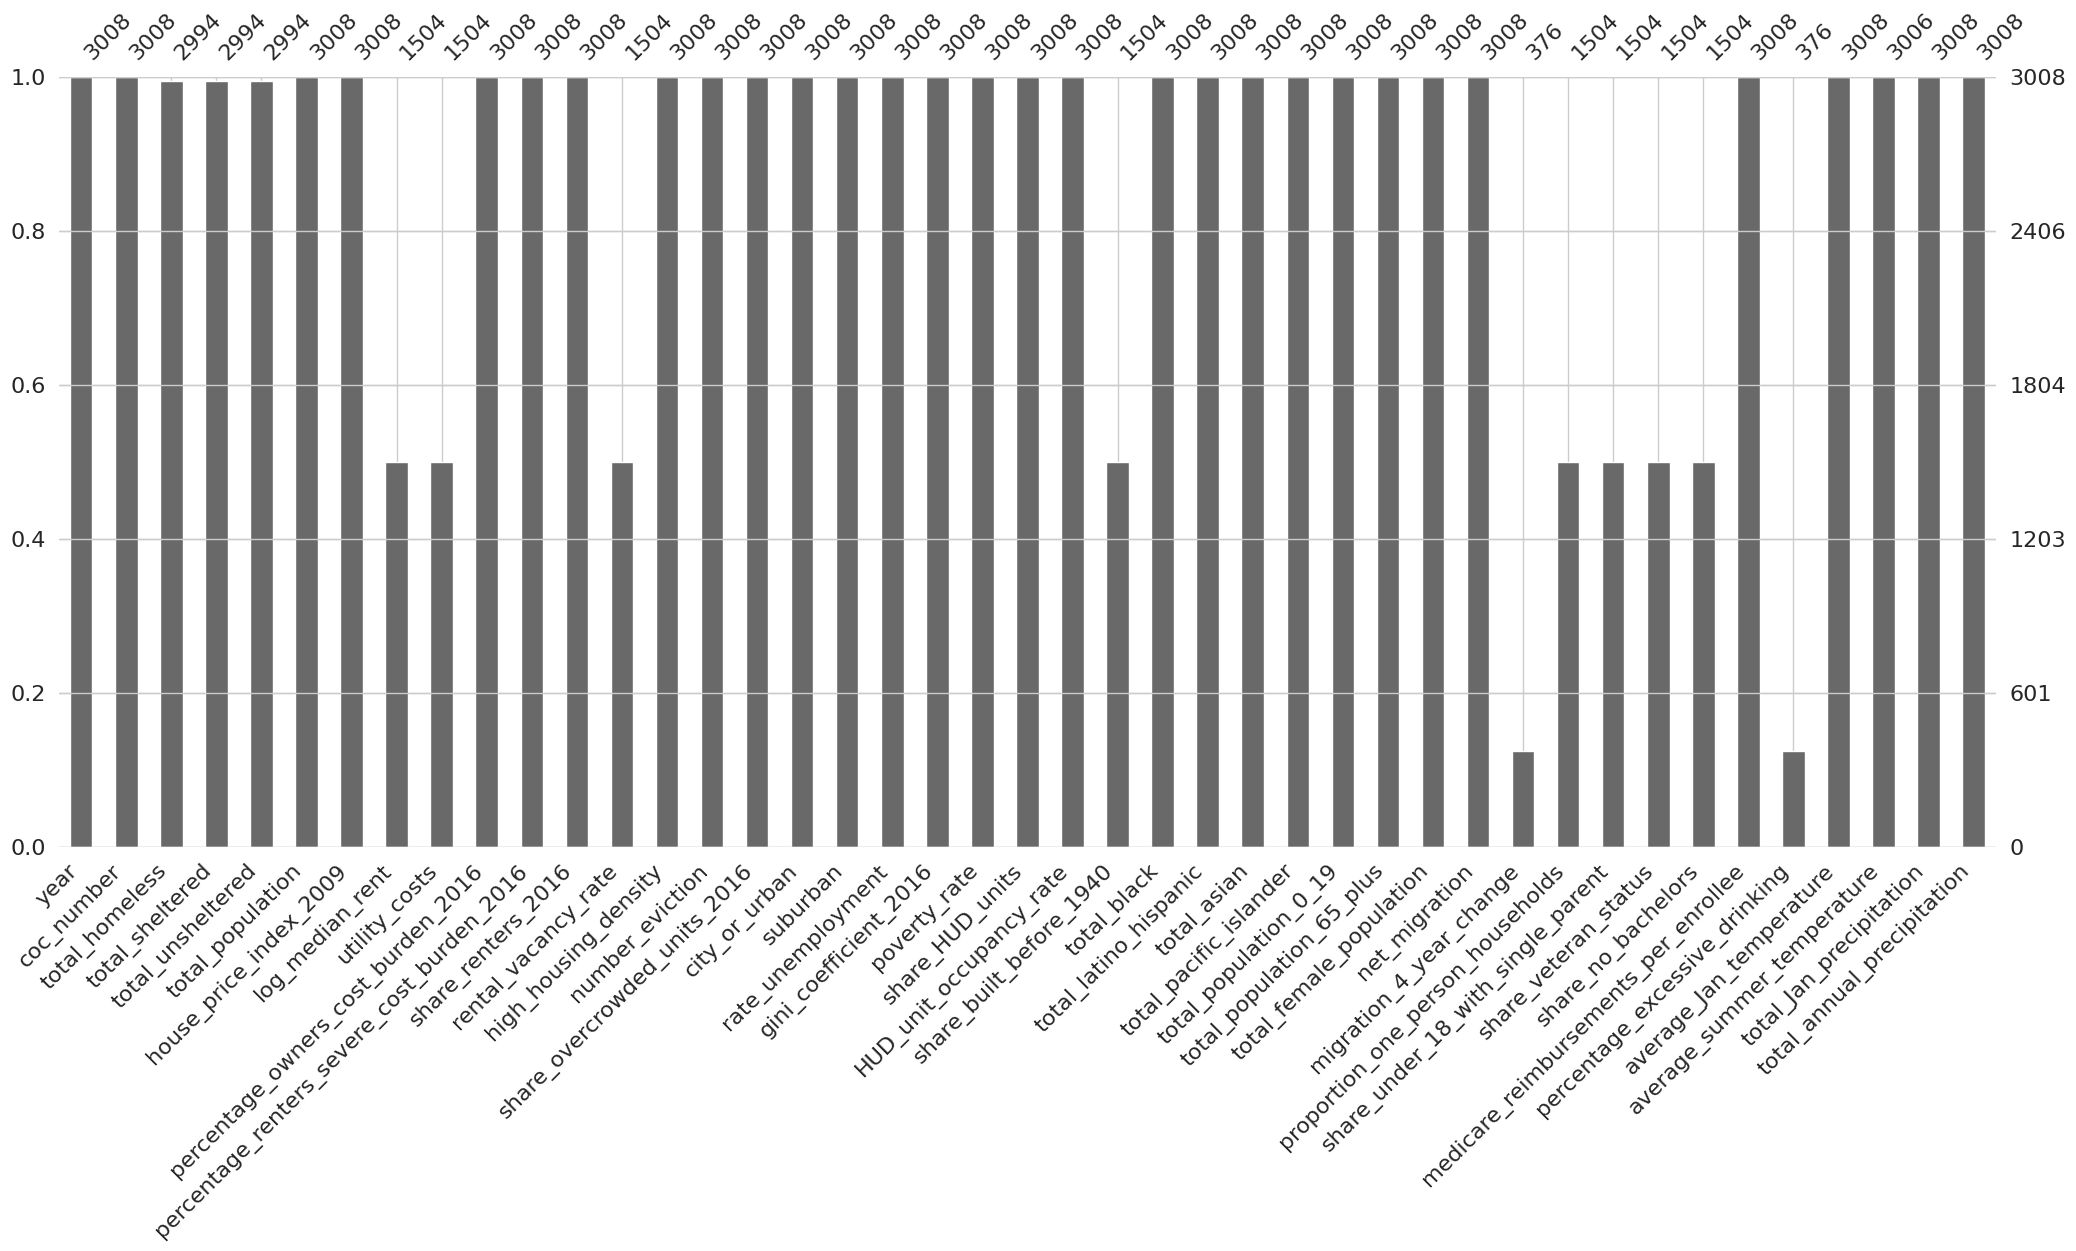

In [18]:
msno.bar(new_df)

<Axes: >

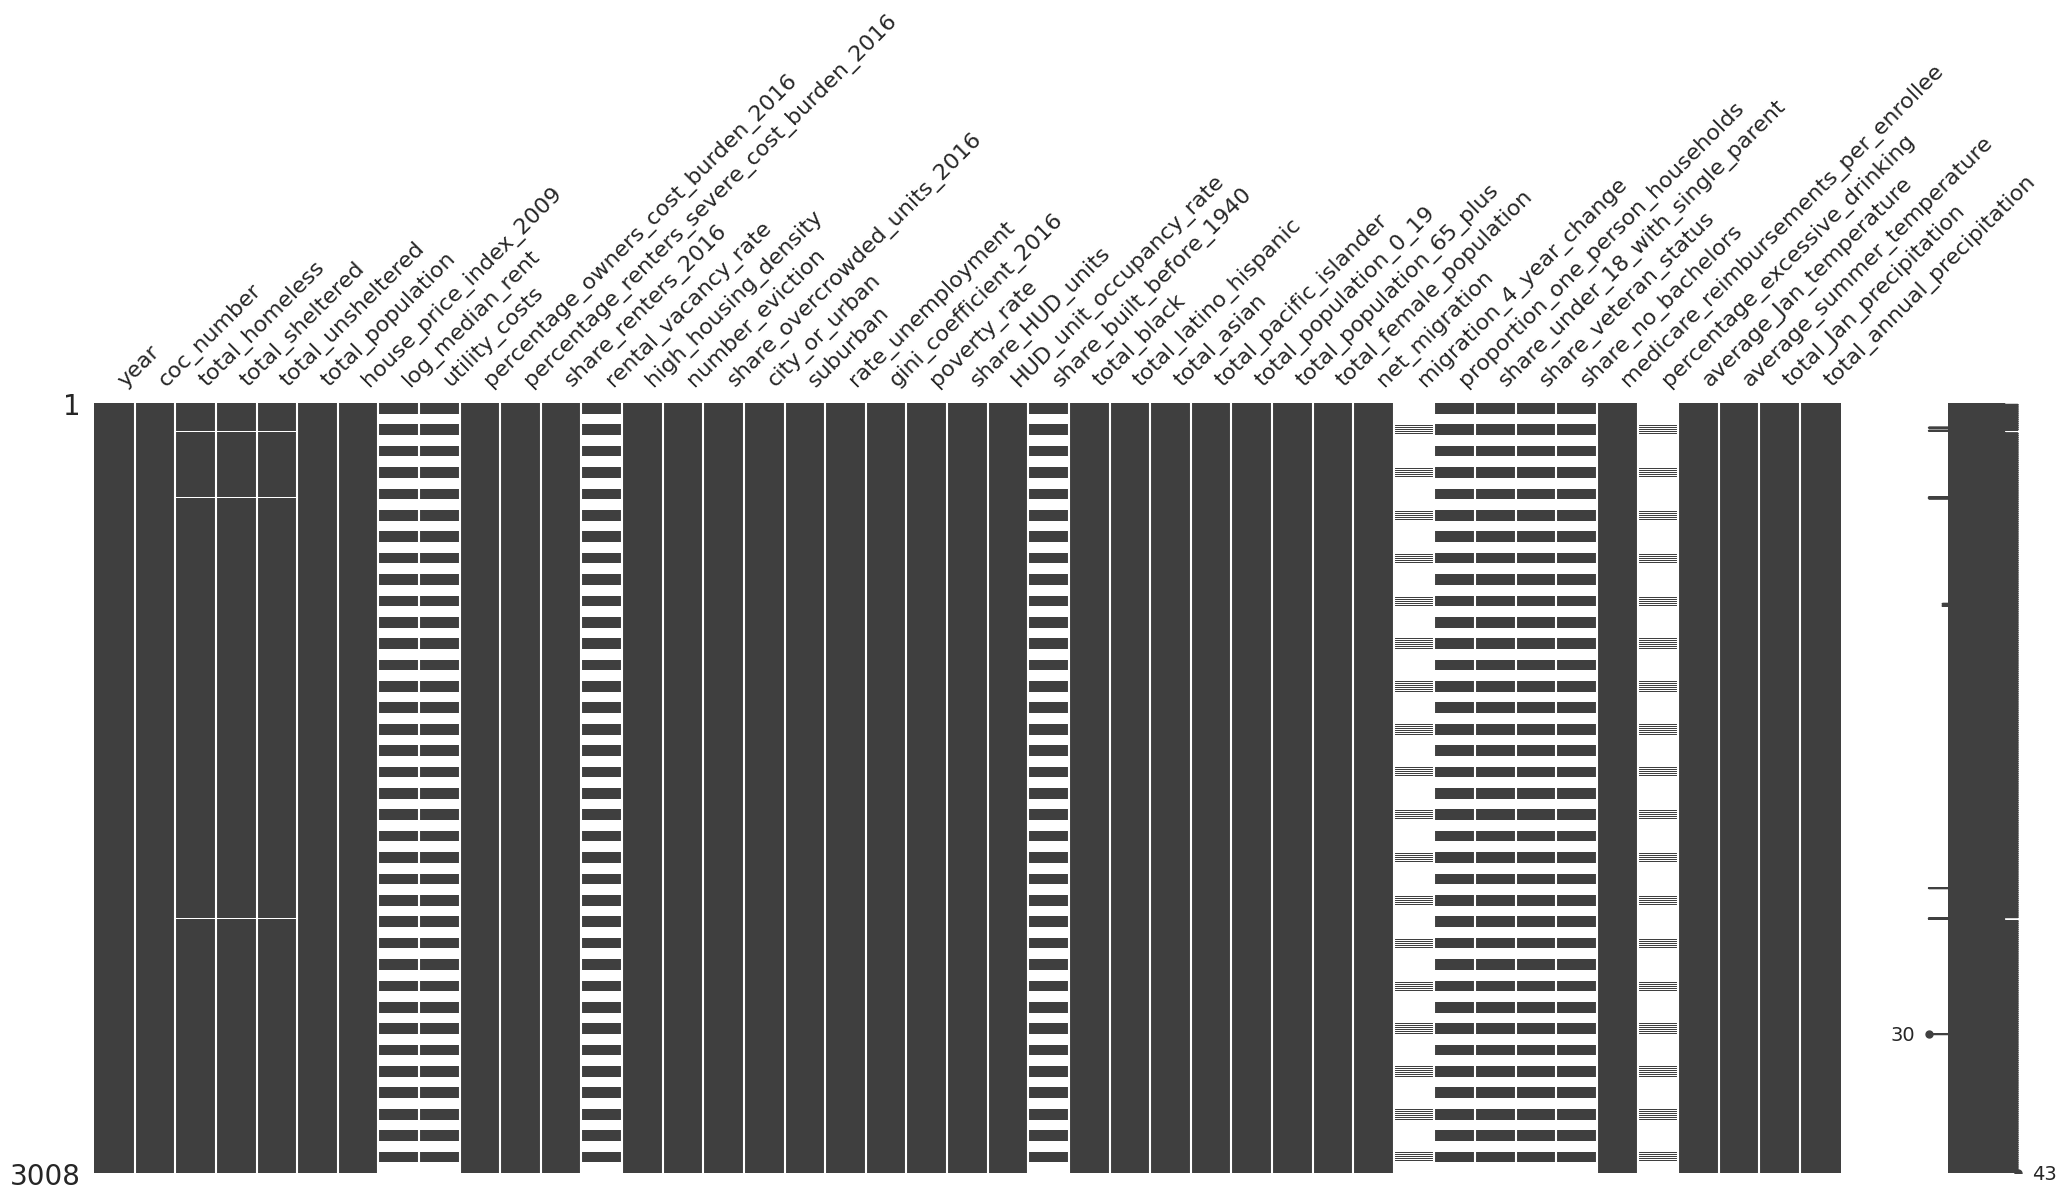

In [19]:
msno.matrix(new_df)

What I discovered is that there are some missing values under total_homeless and there is really only relevant data under the year 2017.

Here I am dropping all of the nan values from `total_homeless` and keeping only the rows with data from 2017.

In [20]:
new_df = new_df.dropna(subset=["total_homeless"])

In [21]:
new_df = new_df.loc[new_df["year"] == 2017]

## Create relevant derived variables as new columns

I want to convert the columns that consist of a total of some groupt to a percentage compared to the total_population. Here I do it by every 10,000 people. This rate matters for `total_homeless`, `total_sheltered`, and `total_unsheltered`. For the other variables they will be normalized in my analysis and so it doesn't matter right now.

In [24]:
columns_to_convert = ["total_homeless", "total_black", "total_latino_hispanic", "total_asian", "total_pacific_islander", "total_sheltered", "total_unsheltered", "total_population_0_19", "total_population_65_plus"]

for column in columns_to_convert:
    new_df[column] = (new_df[column] / new_df["total_population"]) * 10000

In [25]:
new_df = new_df.rename(columns = {"total_homeless":"rate_homeless",
                          "total_sheltered":"rate_sheltered", 
                          "total_unsheltered":"rate_unsheltered"})

## Export the clean .csv file

Export the clean data set

In [27]:
from google.colab import files
new_df.to_csv('clean_homeless.csv', encoding = 'utf-8-sig', index=False)
files.download('clean_homeless.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>